In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import Grid


In [7]:
archivo = "../osm/edificio/run/001_ExportVariabletoCSV/report_ZoneMeanAirTemperature_ZoneTimestep.csv"
def zones_osm(archivo):
    """ Return dataframe with zone mean air temperatures in the OSM specified in archivo and 
    cuts the zone names of the units"""
    nombres = np.genfromtxt(archivo,max_rows=1, dtype="U",delimiter=",")
    # zonas = [nombre for nombre in nombres if "Zone Mean Air Temperature" in nombre]
    tmp = pd.read_csv(archivo,skiprows=1,names=nombres,index_col=0,parse_dates=True)
    zonas = [nombre[:-29] for nombre in nombres[1:]]
    tmp.columns = zonas
    return tmp, zonas

In [8]:
data,zonas = zones_osm(archivo)

In [9]:
zonas

['THERMAL ZONE 1',
 'THERMAL ZONE 10',
 'THERMAL ZONE 11',
 'THERMAL ZONE 12',
 'THERMAL ZONE 13',
 'THERMAL ZONE 14',
 'THERMAL ZONE 15',
 'THERMAL ZONE 16',
 'THERMAL ZONE 17',
 'THERMAL ZONE 18',
 'THERMAL ZONE 2',
 'THERMAL ZONE 3',
 'THERMAL ZONE 4',
 'THERMAL ZONE 5',
 'THERMAL ZONE 6',
 'THERMAL ZONE 7',
 'THERMAL ZONE 8',
 'THERMAL ZONE 9']

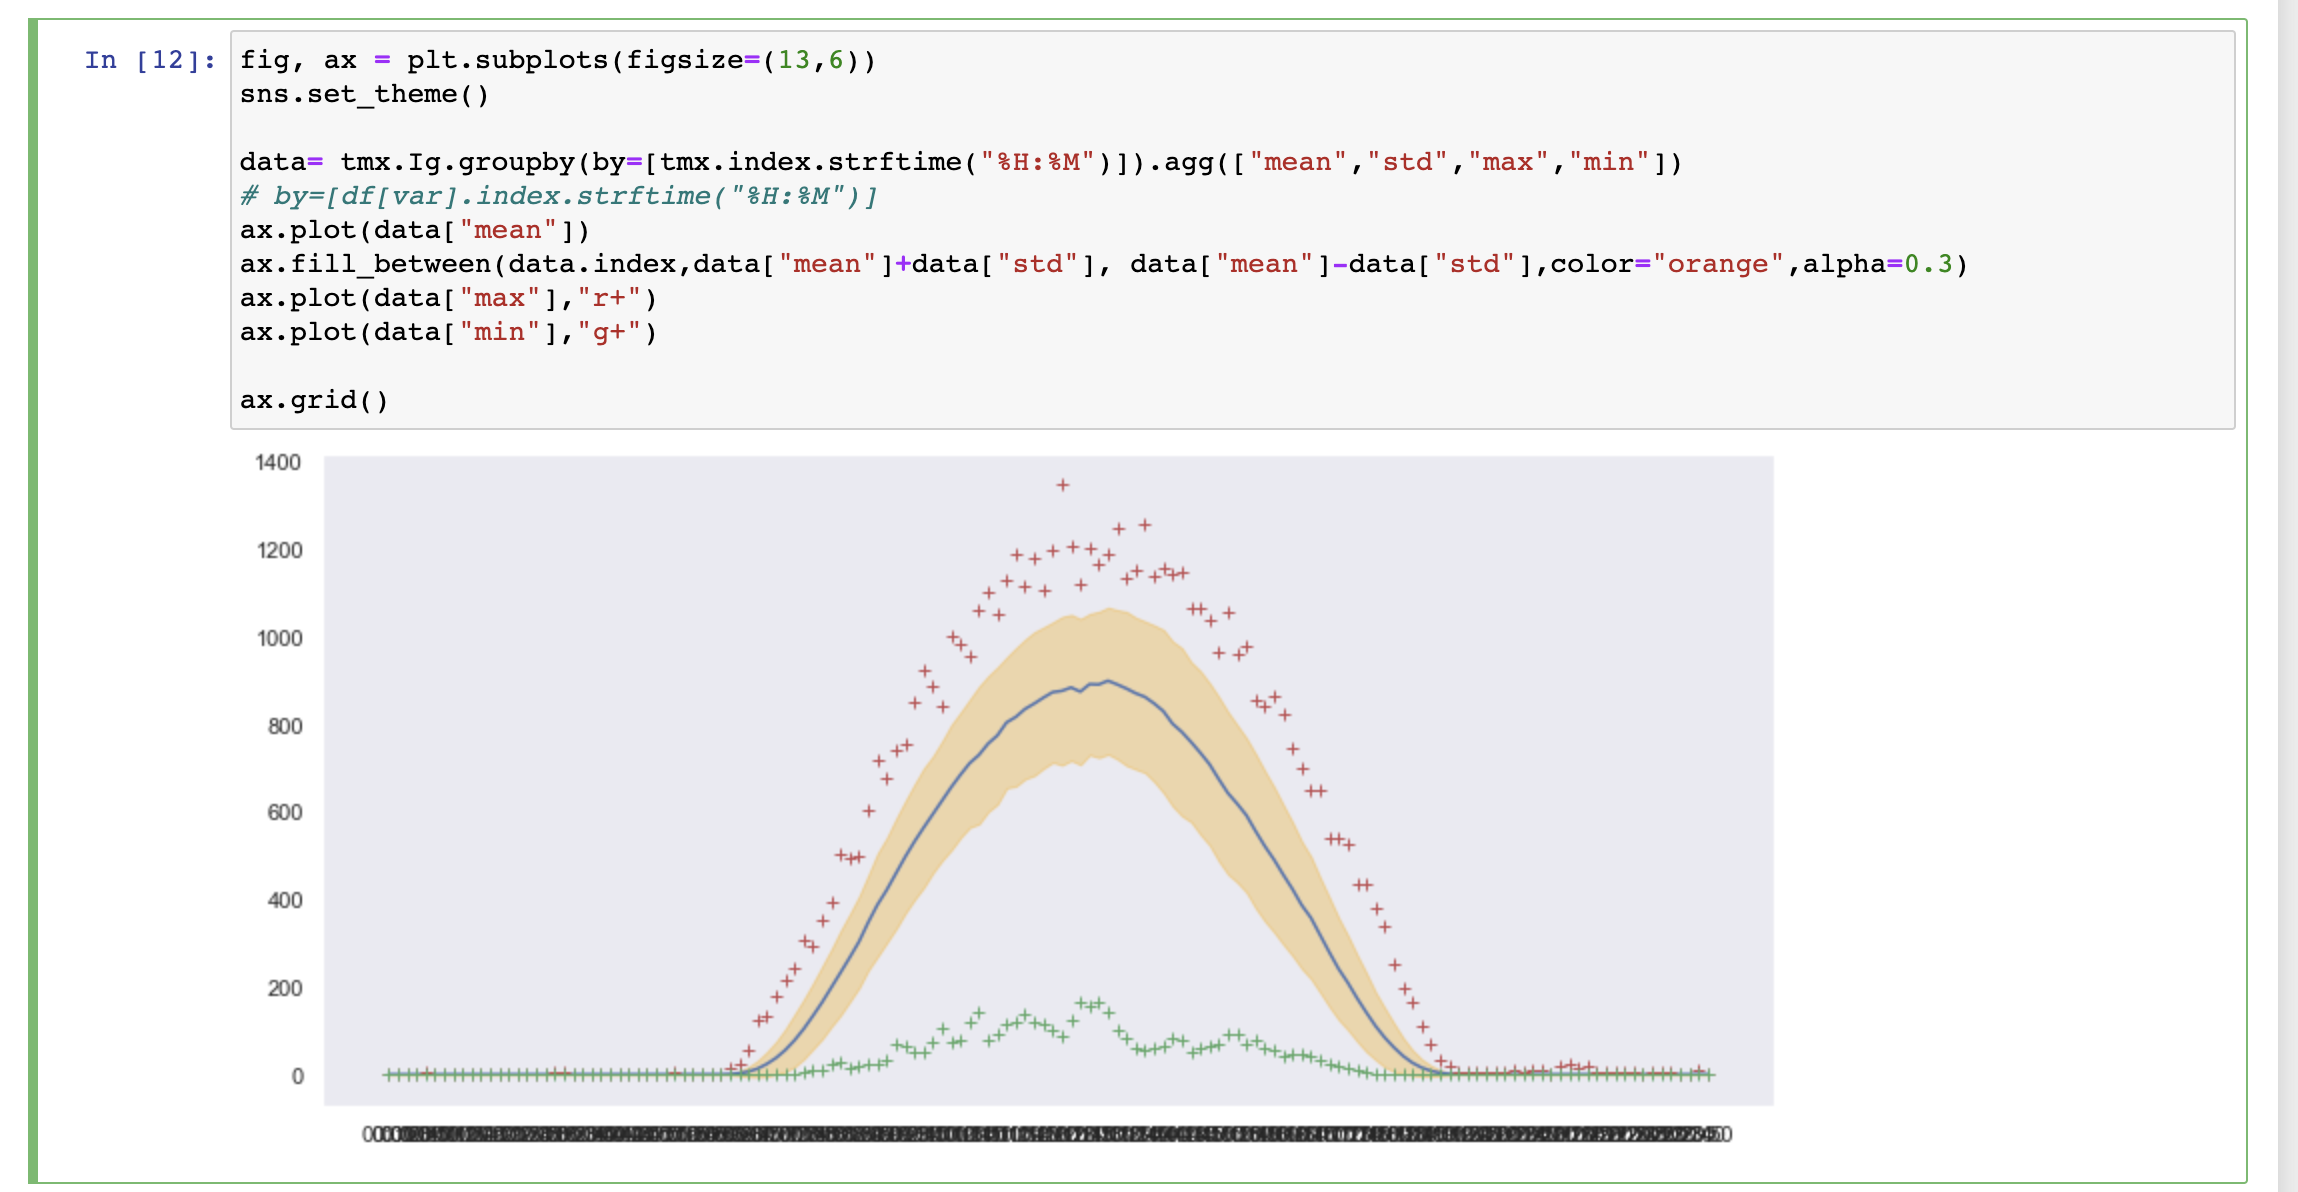

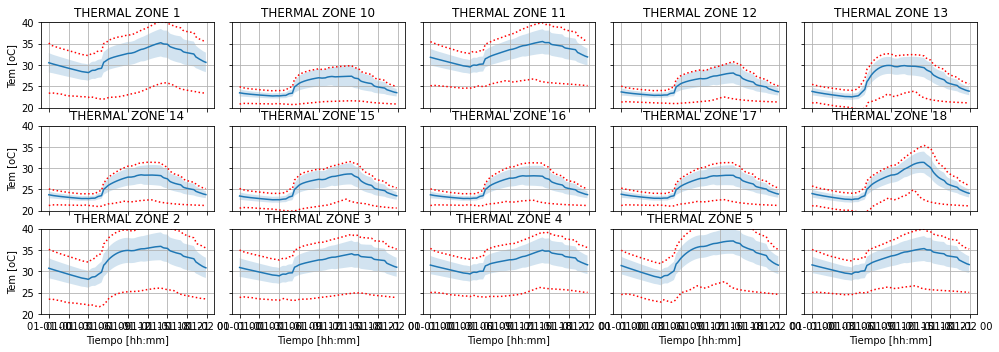

In [20]:

tmp = []
for zona in zonas:
    tmp1 = data[zona].groupby(by=[data.index.time]).agg(["mean","std","max","min"])
    tmp1 = tmp1.add_prefix(zona+"_")
    tmp.append(tmp1)
#     print(data[zona].groupby(by=[data.index.time]) )
tmp2 = pd.concat(tmp,axis=1)
tmp2.index = pd.to_datetime(tmp2.index,format="%H:%M:%S")
# tmp2.index

vmin = 20
vmax = 40
def plot_mean_max_min(ax,data,zona,vmin=vmin,vmax=vmax):
    mean = zona + "_mean"
    std  = zona + "_std"
    Max = zona + "_max"
    Min  = zona + "_min"
    ax.plot(data[mean])
    ax.fill_between(data[mean].index,data[mean] + data[std],data[mean] -data[std],alpha=0.2)
    ax.plot(data[Max],"r:")
    ax.plot(data[Min],"r:")
    ax.set_ylim(vmin,vmax)
    ax.set_xlabel('Tiempo [hh:mm]')
    ax.set_ylabel('Tem [oC]')
    ax.set_title(zona)
    ax.grid()

graficas  = int(tmp2.shape[1]/4)
columnas = 5
renglon = int(graficas/columnas)
# renglon = 9
from mpl_toolkits.axes_grid1 import Grid

fig = plt.figure(figsize=(14,5))
grid = Grid(fig, rect=111, nrows_ncols=(renglon, columnas),axes_pad=0.25)
# print(grid.ngrids)
for i,ax in enumerate(grid):
    mean = zonas[i] + "_mean"
    std  = zonas[i] + "_std"
    Max  = zonas[i] + "_max"
    Min  = zonas[i] + "_min"
    plot_mean_max_min(ax,tmp2,zonas[i],vmin=vmin,vmax=vmax)
#     print(i)

ax.title.set_visible(False)

plt.tight_layout()
